# OSMI Survey: Time Dependent EDA

_By [Michael Rosenberg](mailto:mmrosenb@andrew.cmu.edu)._

_**Description**: Contains my plots that incorporate time as a factor for plotting._

_Last Updated: 5/1/2017 4:06 PM EST._

In [63]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#helpers

%matplotlib inline
sns.set_style("dark")
sigLev = 3

In [25]:
#import dataset
timeDepFrame = pd.read_csv("../../data/processed/procTimeDataset.csv")

# Summary Statistics

In [64]:
timeCountFrame = timeDepFrame.groupby("year",as_index = False)["gender"].count()
timeCountFrame = timeCountFrame.rename(columns = {"gender":"count"})
display(HTML(timeCountFrame.to_html(index = False)))

year,count
2014,1254
2016,1429


_Table 1: Observations by year of our survey._

We see that while we have slightly more observations in 2016 than in 2014, we're talking about the difference of only a few dozen respondents. I would say that this is relatively balanced time-wise.

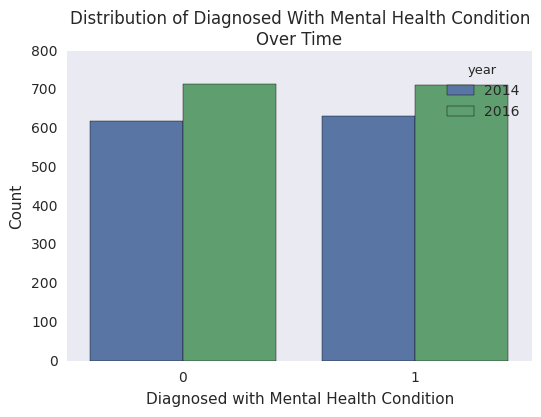

In [66]:
diagTimeCountFrame = timeDepFrame.groupby(["diagnosedWithMHD","year"],
                                as_index = False)["gender"].count()
diagTimeCountFrame = diagTimeCountFrame.rename(columns = {"gender":"count"})
#get density
sns.barplot(x = "diagnosedWithMHD",y = "count",hue = "year",
            data = diagTimeCountFrame)
plt.xlabel("Diagnosed with Mental Health Condition")
plt.ylabel("Count")
plt.title("Distribution of Diagnosed With Mental Health Condition\nOver Time")
plt.savefig("../../reports/thirdBlogPost/figures/figure02.png")

_Figure 1: Distribution of Diagnosed with Mental Health Condition given Time._

We see that the balance looks to be the same between both $2014$ and $2016$, althought there are slightly more observations in $2016$ overall.

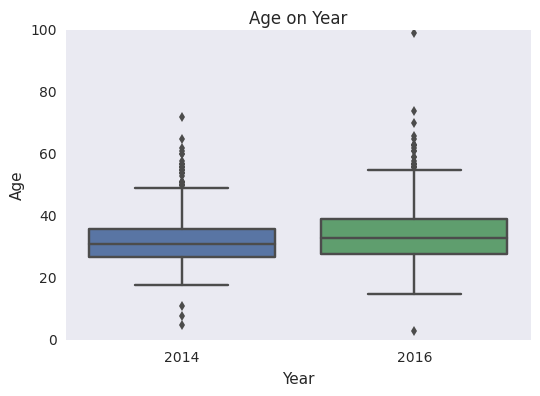

In [67]:
sns.boxplot(x = "year",y = "age",data = timeDepFrame)
plt.xlabel("Year")
plt.ylabel("Age")
plt.title("Age on Year")
plt.savefig("../../reports/thirdBlogPost/figures/figure03.png")

_Figure 2: Distribution of Ages by Year._

We see that both IQRs look very similar to each other, although the $2016$ data happens to have a longer tail of ages than the $2014$ data.

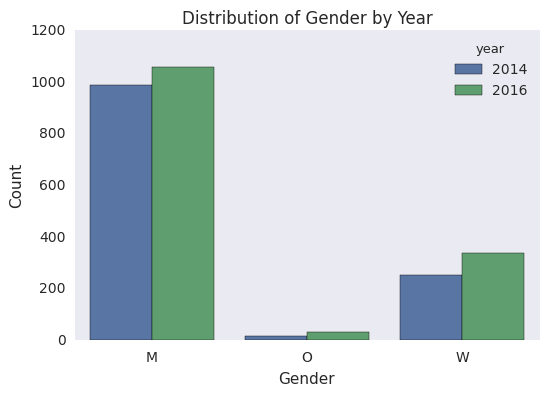

In [70]:
genderTimeCountFrame = timeDepFrame.groupby(["gender","year"],as_index = False)[
                                                "age"].count()
genderTimeCountFrame = genderTimeCountFrame.rename(columns = {"age":"count"})
sns.barplot(x = "gender",y = "count",hue = "year",data = genderTimeCountFrame)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender by Year")
plt.savefig("../../reports/thirdBlogPost/figures/figure04.png")

_Figure 3: Distribution of encoded gender given time._

We see that the distribution relatively doesn't change much between $2014$ and $2016.$ Overall, we do see that men seem to dominate this distribution compared to individuals who identify as women or other genders.

In [32]:
sizeTimeFrame = timeDepFrame.groupby(["companySize","year"],as_index = False)[
                                "gender"].count()
sizeTimeFrame = sizeTimeFrame.rename(columns = {"gender":"count"})
print sizeTimeFrame

       companySize  year  count
0              1-5  2014    160
1              1-5  2016    347
2          100-500  2014    176
3          100-500  2016    246
4           26-100  2014    288
5           26-100  2016    291
6         500-1000  2014     60
7         500-1000  2016     80
8             6-25  2014    289
9             6-25  2016    210
10  More than 1000  2014    281
11  More than 1000  2016    255


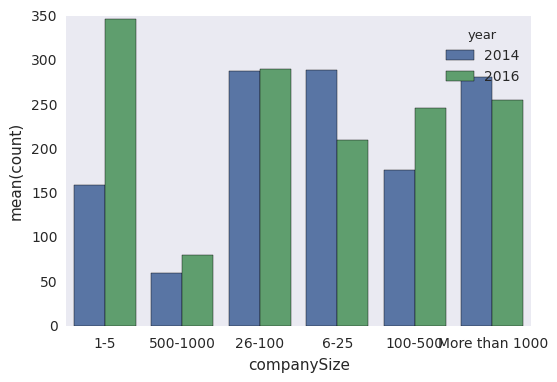

In [34]:
#reorganize into desired shape
sizeTimeFrame = sizeTimeFrame.iloc[[0,1,8,9,4,5,2,3,6,7,10,11],:]
#then plot
sns.barplot(x = "companySize",y = "count",hue = "year",data = sizeTimeFrame)

_Figure 4: Distribution of Company Size Over Time._

# Interaction Effects

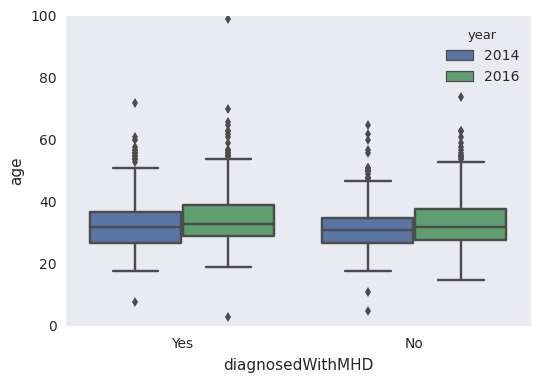

In [36]:
sns.boxplot(x = "diagnosedWithMHD",y = "age",hue = "year",data = timeDepFrame)

_Figure 5: Age on Diagnosis Over Time._

Not much is going on here.

In [39]:
timeDepFrame["diagnosedWithMHD"] = timeDepFrame["diagnosedWithMHD"].map(
                                                {"Yes":1,"No":0})

In [46]:
pd.crosstab([timeDepFrame["year"],timeDepFrame["gender"]],
            timeDepFrame["diagnosedWithMHD"],normalize = "index")

diagnosedWithMHD         0         1
year gender                         
2014 M            0.547112  0.452888
     O            0.187500  0.812500
     W            0.310757  0.689243
2016 M            0.558184  0.441816
     O            0.242424  0.757576
     W            0.348083  0.651917

_Table 2: Effect of gender on diagnosis over time._

We see little interaction effect here.

In [52]:
#generate isUSA
timeDepFrame["isUSA"] = 0
timeDepFrame.loc[(timeDepFrame["workCountry"] == "United States of America") |
                 (timeDepFrame["workCountry"] == "United States"),
                 "isUSA"] = 1

In [54]:
pd.crosstab([timeDepFrame["year"],timeDepFrame["isUSA"]],
            timeDepFrame["diagnosedWithMHD"],normalize = "index")

diagnosedWithMHD         0         1
year isUSA                          
2014 0            0.555336  0.444664
     1            0.454545  0.545455
2016 0            0.588640  0.411360
     1            0.441038  0.558962

_Table 3: Effect of isUSA on diagnosis over time._

Again, little interaction effect.

In [57]:
timeDepFrame["isUK"] = 0
timeDepFrame.loc[timeDepFrame["workCountry"] == "United Kingdom",
                 "isUK"] = 1

In [59]:
pd.crosstab([timeDepFrame["year"],timeDepFrame["isUK"]],
            timeDepFrame["diagnosedWithMHD"],normalize = "index")

diagnosedWithMHD         0         1
year isUK                           
2014 0            0.494393  0.505607
     1            0.500000  0.500000
2016 0            0.490778  0.509222
     1            0.571429  0.428571

_Table 4: Effect of isUK on diagnosis over time._

Interestingly, we start to see some interaction effect where there is little effect in 2014, but there seems to be a strong effect in 2016. This may be some indication of changes in health policy in the UK between $2014$ and $2016$.

In [60]:
timeDepFrame["isCA"] = 0
timeDepFrame.loc[timeDepFrame["workCountry"] == "Canada",
                 "isCA"] = 1

In [61]:
pd.crosstab([timeDepFrame["year"],timeDepFrame["isCA"]],
            timeDepFrame["diagnosedWithMHD"],normalize = "index")

diagnosedWithMHD         0         1
year isCA                           
2014 0            0.495770  0.504230
     1            0.486111  0.513889
2016 0            0.495941  0.504059
     1            0.594595  0.405405

_Table 5: Effect of isCA on diagnosis over time._

We again see major interactions occuring here.

In [62]:
timeDepFrame.to_csv("../../data/processed/timeDataset_withCountryDummies.csv",
                    index = False)